# Regresión Lineal y Polinomial

En este Notebook vamos a aprender cómo hacer una regresión lineal con Scikit Learn y después vamos a ver cómo entrenar nuestro propio modelo de regresión lineal con el algoritmo _Gradient Descent_.

## Regresión Lineal Simple

Para entrenar un modelo de regresión lineal en Scikit Learn usamos la interfaz `fit` - `predict`.

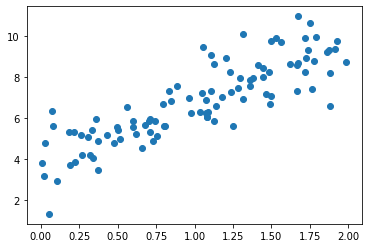

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos datos que se ven lineales
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

plt.scatter(X, y)

In [2]:
from sklearn.linear_model import LinearRegression

# Hacemos la regresión lineal

lin_reg = LinearRegression()

lin_reg.fit(X, y)

# Imprimimos n y m
lin_reg.intercept_, lin_reg.coef_

(array([3.83759944]), array([[2.91470083]]))

In [3]:
# Hacemos una predicción

lin_reg.predict([[5]])

array([[18.41110358]])

Y además, podemos visualizar la regresión.

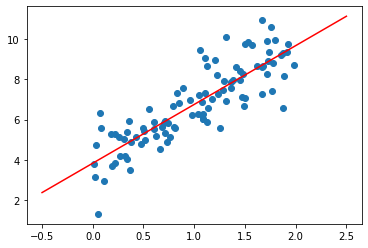

In [4]:
plt.scatter(X, y)
x_values = np.linspace(-0.5, 2.5, 100)
plt.plot(x_values, lin_reg.predict(x_values.reshape(-1, 1)), color="red")

## Regresión Lineal Multivariable

Para hacer una regresión multivariable seguimos la misma estructura de Scikit Learn que hemos usado hasta ahora.

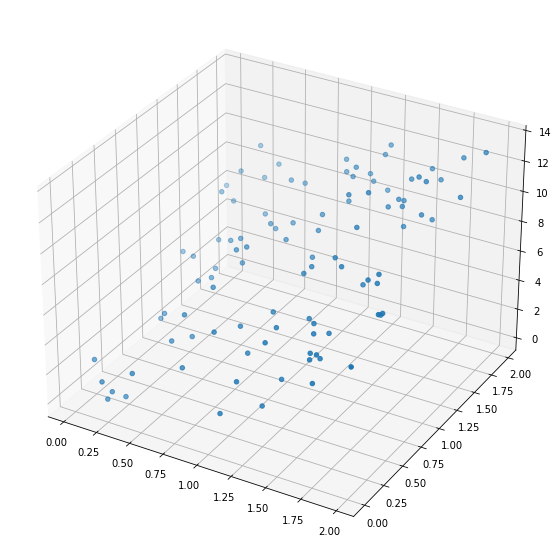

In [5]:
from mpl_toolkits.mplot3d import Axes3D

X = 2 * np.random.rand(100, 2)
y = 3 * X[:,[True, False]] + 4 * X[:,[False, True]] + np.random.randn(100, 1)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,[True, False]], X[:,[False, True]], y,  zdir='z')

In [6]:
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([0.11695131]), array([[3.0435027 , 3.72179725]]))

In [7]:
# Hacer una predicción

lin_reg.predict([[5, 5]])

array([[33.94345106]])

Y ahora podemos graficar la regresión.

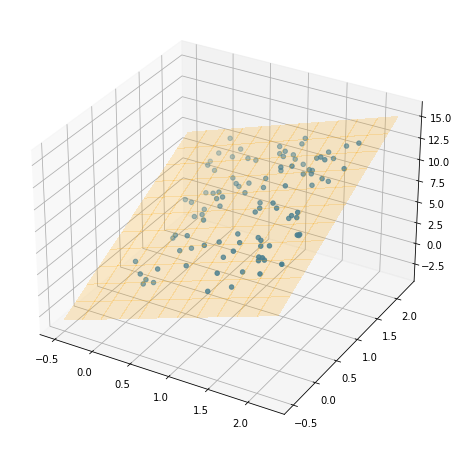

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x_3D = np.arange(-0.5, 2.5, 0.25)
y_3D = np.arange(-0.5, 2.5, 0.25)
X_3D, Y_3D = np.meshgrid(x_3D, y_3D)

Z = []
for i in range(X_3D.shape[0]):
    Z_row = []
    for j in range(Y_3D.shape[1]):
        z = lin_reg.predict([[X_3D[i, j], Y_3D[i, j]]])
        Z_row.append(float(z[0]))
    Z.append(Z_row)

Z = np.array(Z)

ax.plot_surface(X_3D, Y_3D, Z, linewidth=0, antialiased=False, color="orange", alpha=0.2)

ax.scatter(X[:,[True, False]], X[:,[False, True]], y,  zdir='z')

## Regresión Polinomial

Cuando tenemos puntos en el plano, podemos hacer _fit_ de un polinomio por los puntos en el plano usando el mismo algoritmo de regresión multivariable. Supón que tienes los puntos:

$$
[(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)]
$$

Si queremos una regresión con un polinomio de grado $k$ sobre estos datos, tenemos que agregar potencias de cada _feature_ hasta $k$ y después hacer _fit_ sobre eso:

| $f_0$ | $f_1$ | $f_2$ | $\dots$ | $f_k$ |
|---|---|---|---|---|
| $1$ | $x_1$ | $x_1^2$ | $\dots$ | $x_1^k$ |
| $1$ | $x_2$ | $x_2^2$ | $\dots$ | $x_2^k$ |
| $1$ | $\dots$ | $\dots$ | $\dots$ | $\dots$ |
| $1$ | $x_n$ | $x_n^2$ | $\dots$ | $x_n^k$ |

Obtener estas _features_ extendidas es fácil con Scikit Learn.

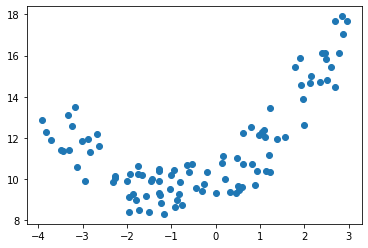

In [12]:
# Primero creamos datos que se ven cuadráticos

X = 7 * np.random.rand(100, 1) - 4
y = 0.5 * X**2 + X + 10 + np.random.randn(100, 1)

plt.scatter(X, y)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# Si agregamos include_bias=True se crea una primera columna llena de 1s
# Esto representa el coeficiente de posición
# Pero el método fit de Linear Regression no lo necesita!
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[ 1.54801889e-01,  2.39636247e-02],
       [-3.33151979e+00,  1.10990241e+01],
       [-1.27713186e+00,  1.63106579e+00],
       [ 6.27677845e-01,  3.93979477e-01],
       [-4.53143920e-01,  2.05339412e-01],
       [ 2.40821693e+00,  5.79950881e+00],
       [ 4.95078826e-01,  2.45103044e-01],
       [ 2.70110201e+00,  7.29595206e+00],
       [ 8.82426654e-01,  7.78676800e-01],
       [-1.93079066e-01,  3.72795257e-02],
       [-2.00569237e+00,  4.02280189e+00],
       [-3.24001249e+00,  1.04976809e+01],
       [-1.28445102e+00,  1.64981441e+00],
       [-3.30016715e+00,  1.08911032e+01],
       [-1.56901284e+00,  2.46180128e+00],
       [ 1.97841505e+00,  3.91412613e+00],
       [ 2.47020598e+00,  6.10191757e+00],
       [-1.73309214e+00,  3.00360836e+00],
       [-1.45985831e+00,  2.13118628e+00],
       [ 2.69571767e+00,  7.26689374e+00],
       [ 1.20448825e+00,  1.45079194e+00],
       [ 1.22146634e+00,  1.49198002e+00],
       [-2.66575538e+00,  7.10625172e+00],
       [-2.

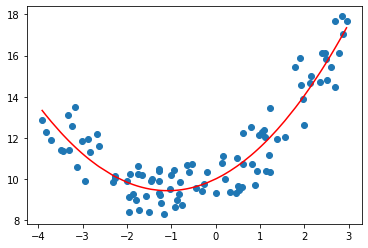

In [15]:
# Ahora hacemos la regresión y la graficaremos

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

plt.scatter(X, y)

# Para graficar la curva debemos ordenar los elementos según X y la primera columna de X_poly
# Recordemos además que predict recibe el x y x^2
plt.plot(X[X[:,0].argsort()], lin_reg.predict(X_poly[X_poly[:,0].argsort()]), color='red')

Ahora, ¿por qué esto funciona? Esto es algo que tendrás que descubrir en el control.

## Regularización

Ahora vamos a ver las técnicas de regularización mencionadas en clases:

- Ridge Regression
- Lasso Regression
- Elastic Net

Estas técnicas evitan que hayan coeficientes muy altos. Partamos con un ejemplo de Ridge Regression.

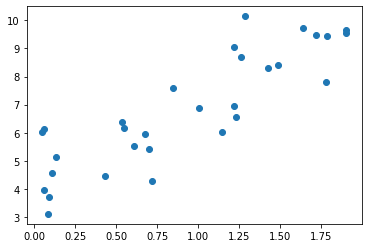

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Creamos datos que se ven lineales
X = 2 * np.random.rand(30, 1)
y = 4 + 3*X + np.random.randn(30, 1)

plt.scatter(X, y)

Vamos a entrenar el modelo de regresión lineal respectivo, y luego un modelo con _Ridge Regression_ con distintos valores de $\alpha$.

In [36]:
from sklearn.linear_model import LinearRegression, Ridge

linear_reg = LinearRegression()
ridge_reg_1 = Ridge(alpha=1)
ridge_reg_2 = Ridge(alpha=10)

linear_reg.fit(X, y)
ridge_reg_1.fit(X, y)
ridge_reg_2.fit(X, y)

Ridge(alpha=10)

Ahora , vamos a graficar las tres regresiones.

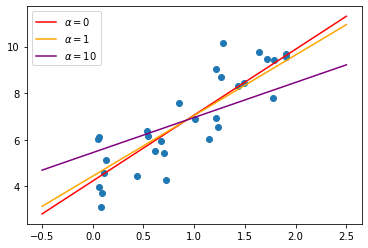

In [37]:
plt.scatter(X, y)
x_values = np.linspace(-0.5, 2.5, 100)
plt.plot(x_values, linear_reg.predict(x_values.reshape(-1, 1)), color="red", label="$\\alpha = 0$")
plt.plot(x_values, ridge_reg_1.predict(x_values.reshape(-1, 1)), color="orange", label="$\\alpha = 1$")
plt.plot(x_values, ridge_reg_2.predict(x_values.reshape(-1, 1)), color="purple", label="$\\alpha = 10$")
plt.legend()

Ridge también lo podemos usar cuando hacemos una regresión polinomial. Veamos que efecto tiene cuando intentamos hacer `fit` de un polinomio de grado 10.

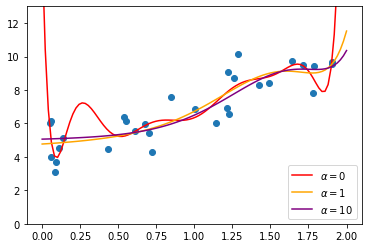

In [40]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly_10 = poly_features.fit_transform(X)

linear_reg = LinearRegression()
ridge_reg_1 = Ridge(alpha=1)
ridge_reg_2 = Ridge(alpha=10)

linear_reg.fit(X_poly_10, y)
ridge_reg_1.fit(X_poly_10, y)
ridge_reg_2.fit(X_poly_10, y)

plt.scatter(X, y)

x_values = np.linspace(0, 2, 100)
x_values_poly = poly_features.fit_transform(x_values.reshape(-1, 1))

plt.plot(x_values, linear_reg.predict(x_values_poly), color="red", label="$\\alpha = 0$")
plt.plot(x_values, ridge_reg_1.predict(x_values_poly), color="orange", label="$\\alpha = 1$")
plt.plot(x_values, ridge_reg_2.predict(x_values_poly), color="purple", label="$\\alpha = 10$")
plt.ylim(0, 13)
plt.legend()

Como vemos, al regularizar, también podemos generar curvas que generalizan mejor nuestros datos. Ahora veamos un ejemplo con Lasso.

## Lasso Regression

Vamos a ver un ejemplo con Lasso y dos dimensiones. Recordemos que en general necesitamos estandarizar nuestros datos, ya que las diferencias de la escala de nuestros datos pueden afectar la regularización.

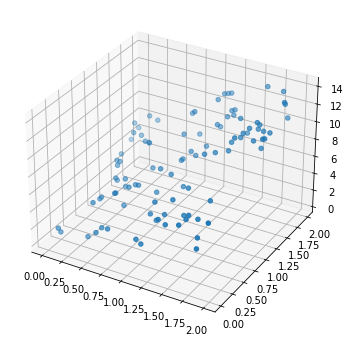

In [41]:
from mpl_toolkits.mplot3d import Axes3D

X = 2 * np.random.rand(100, 2)
y = 3 * X[:,[True, False]] + 4 * X[:,[False, True]] + np.random.randn(100, 1)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,[True, False]], X[:,[False, True]], y,  zdir='z')

In [43]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Entrenamos nuestro modelo
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_std, y)

Lasso(alpha=0.1)

Ahora recordemos que al predecir, necesitamos transformar la instancia a la nueva escala. Recordemos que no hay que reentrenar el _scaler_ porque ya "aprendió" una transformación a la nueva escala con los datos de entrenamiento.

In [62]:
instance = [1, 1]
instance_std = scaler.transform([instance])

lasso_reg.predict(instance_std)

array([7.00127328])

Como vemos, la predicción calza con la relación original, ya que los datos distribuyen (aproximadamente) como $z = 3x + 4y$. Para terminar, veamos un ejemplo con Elastic Net.

## Elastic Net

El funcionamiento es similar a lo que ya hemos visto, lo que ahora además debemos entregar el valor de $r$, que corresponde al mix entre lasso y ridge. El parámetro se llama `l1_ratio`.

In [63]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Entrenamos con los datos estandarizados
elastic_reg.fit(X_std, y)

# Para predecir transformamos nuestra instancia
instance = [1, 2]
instance_std = scaler.transform([instance])

# Vemos la predicción
elastic_reg.predict(instance_std)

array([10.50988772])